In [1]:
import warnings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score

from get_data import get_balanced_exoplanet_data

warnings.simplefilter("ignore")

## Test xgboost 



1.0


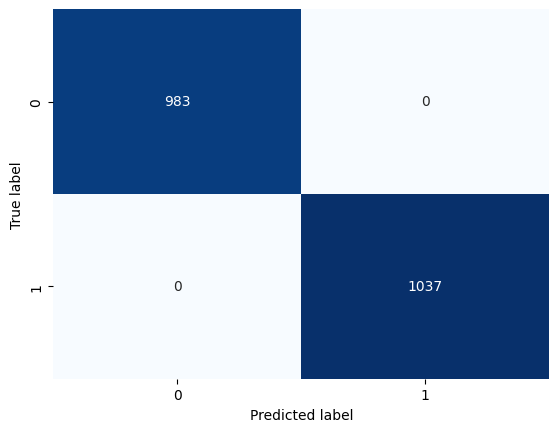

In [2]:
x_train, x_test, y_train, y_test = get_balanced_exoplanet_data()

# Parameters
rng_seed = 2023
depth = 5
boosting_rounds = 100

model = xgb.XGBClassifier(
    max_depth=depth,
    random_state=rng_seed,
    class_weight="balanced",
    n_estimators=boosting_rounds,
)
model.fit(x_train, y_train)
pred = model.predict(x_test)

# Confusion matrix
sns.heatmap(
    confusion_matrix(y_test, pred),
    annot=True,
    cmap="Blues",
    cbar=False,
    fmt=".0f",
)
plt.xlabel("Predicted label")
plt.ylabel("True label")

# Metrics
print(accuracy_score(y_test, pred))

## Xgboost grid search as func of depth and boosting rounds

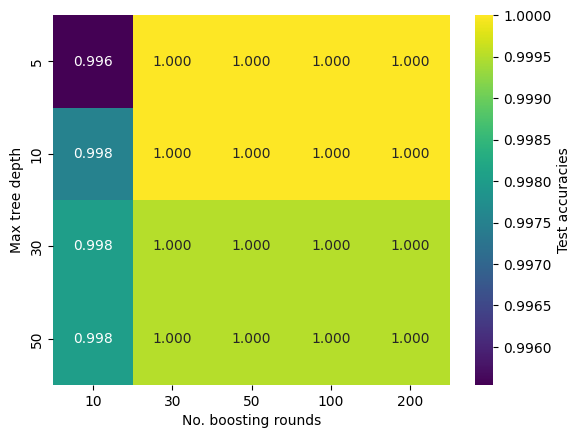

In [15]:
# Parameters
depths = [5, 10, 30, 50]
boost_vals = [10, 30, 50, 100, 200]
filename = "../results/figures/xgboost_gridsearch_depth_boost.png"

accuracies = np.empty((len(depths), len(boost_vals)))
preds = list()
for i, depth in enumerate(depths):
    for j, boost in enumerate(boost_vals):
        model = xgb.XGBClassifier(
            max_depth=depth,
            random_state=rng_seed,
            class_weight="balanced",
            n_estimators=boost,
        )
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        preds.append(pred)
        accuracies[i, j] = accuracy_score(y_test, pred)


sns.heatmap(
    accuracies,
    annot=True,
    fmt=".3f",
    cmap="viridis",
    xticklabels=boost_vals,
    yticklabels=depths,
    cbar_kws={"label": "Test accuracies"},
)
plt.xlabel("No. boosting rounds")
plt.ylabel("Max tree depth")

if filename:
    plt.savefig(filename)
plt.show(); 